# **Cek Isi Folder**

In [1]:
import os
import pandas as pd

BASE_DIR = "/kaggle/input/datasets/yohannaanzelika/Dataset A Comprehensive Dataset Cyberbullying/A Comprehensive Dataset for Automated Cyberbullying Detection"
target = ["3. Aggressive_All.csv", "4. Non_Aggressive_All.csv", "6. CB_Labels.csv"]

print("BASE_DIR:", BASE_DIR)
print("Files found:")

for f in target:
    path = os.path.join(BASE_DIR, f)
    print("-", f, "| exists:", os.path.exists(path), "| size(MB):", round(os.path.getsize(path)/1024/1024, 2) if os.path.exists(path) else None)

BASE_DIR: /kaggle/input/datasets/yohannaanzelika/Dataset A Comprehensive Dataset Cyberbullying/A Comprehensive Dataset for Automated Cyberbullying Detection
Files found:
- 3. Aggressive_All.csv | exists: False | size(MB): None
- 4. Non_Aggressive_All.csv | exists: False | size(MB): None
- 6. CB_Labels.csv | exists: False | size(MB): None


# **Import Dataset**

In [2]:
import pandas as pd

# Sesuaikan dengan path folder yang benar
DATA_DIR = "/kaggle/input/datasets/yohannaanzelika/dataset-a-comprehensive-dataset-cyberbullying/A Comprehensive Dataset for Automated Cyberbullying Detection"

# Membaca file CSV
aggressive_df = pd.read_csv(f"{DATA_DIR}/3. Aggressive_All.csv")
non_aggressive_df = pd.read_csv(f"{DATA_DIR}/4. Non_Aggressive_All.csv")
cb_labels_df = pd.read_csv(f"{DATA_DIR}/6. CB_Labels.csv")

# Menampilkan ukuran file
print("Aggressive shape:", aggressive_df.shape)
print("Non-Aggressive shape:", non_aggressive_df.shape)
print("CB Labels shape:", cb_labels_df.shape)

Aggressive shape: (118828, 2)
Non-Aggressive shape: (118828, 2)
CB Labels shape: (9511, 7)


# **Pemberian Label**

In [3]:
import pandas as pd

# Pemberian label pada dataset agresif dan non-agresif
aggressive_df["label"] = 1  # Label untuk data agresif
non_aggressive_df["label"] = 0  # Label untuk data non-agresif

# Tampilkan 10 data contoh untuk masing-masing label
print("Contoh data dengan label 1 (Aggressive):")
print(aggressive_df.sample(10))

print("\nContoh data dengan label 0 (Non-Aggressive):")
print(non_aggressive_df.sample(10))

Contoh data dengan label 1 (Aggressive):
         No.                                            Message  label
26558  26559  You think youre special Why do Jews get their ...      1
25552  25553  kittoms Social Justice Warrior AKA the liberal...      1
24930  24931  bastard   why do you hate jonathan pachecoyou ...      1
72896  72897  YUO SCRUB MY EDITS I SCRUB YOURS THATS FAIR AI...      1
3562    3563  The links do work which is proof that youre no...      1
98426  98427  Fuck you You sadistic admin that orgasms when ...      1
65225  65226                                       Why not both      1
19012  19013  Note If you want me to offer you sexual servic...      1
72111  72112  Do not ever send me a message again i will hun...      1
95295  95296  MaxBlumenthal Islamophobia  fear of this httpt...      1

Contoh data dengan label 0 (Non-Aggressive):
           No.                                            Message  label
49205    49206  Sounds like an excuse to remove items you d

# **Penggabungan Dataset**

In [4]:
# Gabungkan data agresif dan non-agresif
df = pd.concat([aggressive_df, non_aggressive_df], ignore_index=True)

# Tampilkan informasi dan contoh data setelah penggabungan
print("\nTotal data setelah digabung:", df.shape)
print("\nContoh 10 data setelah penggabungan:")
print(df.sample(10))


Total data setelah digabung: (237656, 3)

Contoh 10 data setelah penggabungan:
           No.                                            Message  label
212947   94120  A suggestion  Why dont you take all but Greg L...      0
130994   12167  Youre right I didnt know this   As Im not a na...      0
134695   15868  Maps of the Baltic Lands  AD  httpwwwlibutexas...      0
485        486  FUCK YOU TRUTH KILLER    Headline text      He...      1
9083      9084              do me a favor alan           FUCK OFF      1
214806   95979  I AM SHADOWJAMS WORST NIGHTMERE THE WIKIPEDIA ...      0
128930   10103  Concering your modification to the article Har...      0
231097  112270  Reference    To  ArnoldDumlao and his sockpupp...      0
32011    32012  STOP CHANGON IT FUCKEN MORONS HE AM RUNNEN IN ...      1
122695    3868  Youve got a lot of mail  Your mailbox is full ...      0


# **Cek Missing Value**

In [5]:
# Cek Missing Values sebelum pembersihan
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Tampilkan 10 data pertama sebelum pembersihan
print("\n10 Data pertama sebelum pembersihan:")
print(df[["No.", "Message", "label"]].head(10))

# Lakukan pembersihan (menghapus missing values pada kolom "Message")
df0 = df.dropna(subset=["Message"]).copy()

# Cek Missing Values setelah pembersihan
print("\nMissing values setelah pembersihan:")
print(df0.isnull().sum())

# Tampilkan 10 data pertama setelah pembersihan
print("\n10 Data pertama setelah pembersihan:")
print(df0[["No.", "Message", "label"]].head(10))

Missing values sebelum pembersihan:
No.         0
Message    71
label       0
dtype: int64

10 Data pertama sebelum pembersihan:
   No.                                            Message  label
0    1  zhha Islam does nothing but freeze the status ...      1
1    2                       You dont get out much do you      1
2    3  MaxBlumenthal Campagnebds Blumenthal self prom...      1
3    4  No silly it isnt ITS UR MOMS and might I say q...      1
4    5  Yes there is even more rape in Muslim countrie...      1
5    6  I think that you are so sexy and hot and sexy ...      1
6    7  hey shithead   quit fucking with all the ufc p...      1
7    8  WOW you suck cock You upset me so much with yo...      1
8    9  Hahaha you dont actually believe this bullshit...      1
9   10  czechofile is worse than a pedophile   czechof...      1

Missing values setelah pembersihan:
No.        0
Message    0
label      0
dtype: int64

10 Data pertama setelah pembersihan:
   No.                       

# **Cek Duplicate**

In [6]:
import pandas as pd

# Misalkan df0 adalah dataframe awal yang sudah ada

# Membersihkan kolom 'Message' untuk membuat kolom 'clean_text'
df0['clean_text'] = df0['Message'].str.strip().str.lower()

# Menghapus duplikat berdasarkan 'clean_text'
df1 = df0.drop_duplicates(subset=['clean_text']).copy()

# Menampilkan informasi tentang data setelah penghapusan duplikat
print(f"Total data setelah penghapusan duplikat: {df1.shape}")

# Menampilkan 10 data pertama tanpa kolom 'clean_text'
print(df1[['No.', 'Message', 'label']].head(10))

Total data setelah penghapusan duplikat: (131106, 4)
   No.                                            Message  label
0    1  zhha Islam does nothing but freeze the status ...      1
1    2                       You dont get out much do you      1
2    3  MaxBlumenthal Campagnebds Blumenthal self prom...      1
3    4  No silly it isnt ITS UR MOMS and might I say q...      1
4    5  Yes there is even more rape in Muslim countrie...      1
5    6  I think that you are so sexy and hot and sexy ...      1
6    7  hey shithead   quit fucking with all the ufc p...      1
7    8  WOW you suck cock You upset me so much with yo...      1
8    9  Hahaha you dont actually believe this bullshit...      1
9   10  czechofile is worse than a pedophile   czechof...      1


# **Pembersihan dan Normalisasi Teks**

In [7]:
import pandas as pd

# Fungsi untuk pembersihan dan normalisasi teks
def clean_and_normalize(df):
    # Membersihkan dan menormalkan kolom 'Message' untuk membuat kolom 'clean_text'
    df['clean_text'] = df['Message'].str.strip().str.lower()  # Menghapus spasi ekstra dan mengubah menjadi huruf kecil
    
    # Menghapus baris dengan 'clean_text' kosong setelah pembersihan
    df = df[df['clean_text'].str.len() > 0]

    return df

# Misalkan df adalah dataframe yang sudah ada dengan kolom 'Message', 'label', dll.
df_cleaned = clean_and_normalize(df)  # Panggil fungsi pembersihan dan normalisasi

# Menampilkan 10 data pertama setelah pembersihan dan normalisasi
print("\nMenampilkan 10 Data Pertama Setelah Pembersihan dan Normalisasi:")

# Menampilkan hanya kolom yang diinginkan
df_display = df_cleaned[['No.', 'Message', 'label', 'clean_text']].head(10)

# Tampilkan data dalam format markdown untuk hasil yang lebih terstruktur
from IPython.display import display, Markdown

# Format data sebagai tabel markdown
markdown_table = df_display.to_markdown(index=False)
display(Markdown(markdown_table))


Menampilkan 10 Data Pertama Setelah Pembersihan dan Normalisasi:


|   No. | Message                                                                                                                                                                                                                                                                                                                                                                             |   label | clean_text                                                                                                                                                                                                                                                                                                                                                                          |
|------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|     1 | zhha Islam does nothing but freeze the status of women to the th century                                                                                                                                                                                                                                                                                                            |       1 | zhha islam does nothing but freeze the status of women to the th century                                                                                                                                                                                                                                                                                                            |
|     2 | You dont get out much do you                                                                                                                                                                                                                                                                                                                                                        |       1 | you dont get out much do you                                                                                                                                                                                                                                                                                                                                                        |
|     3 | MaxBlumenthal Campagnebds Blumenthal self promotion The only groups that attack talks and kill people are Maxs terrorist Muslim friends                                                                                                                                                                                                                                             |       1 | maxblumenthal campagnebds blumenthal self promotion the only groups that attack talks and kill people are maxs terrorist muslim friends                                                                                                                                                                                                                                             |
|     4 | No silly it isnt ITS UR MOMS and might I say quite the lovely page indeed  Oh and UR MEAN no im just kiddding but ur not all that nice eithercause u have a black black heart                                                                                                                                                                                                       |       1 | no silly it isnt its ur moms and might i say quite the lovely page indeed  oh and ur mean no im just kiddding but ur not all that nice eithercause u have a black black heart                                                                                                                                                                                                       |
|     5 | Yes there is even more rape in Muslim countries but it is not reported                                                                                                                                                                                                                                                                                                              |       1 | yes there is even more rape in muslim countries but it is not reported                                                                                                                                                                                                                                                                                                              |
|     6 | I think that you are so sexy and hot and sexy that i would just have sex with you and make out with you and be gay because you are sexier than sex on a sexy sex day  SEX                                                                                                                                                                                                           |       1 | i think that you are so sexy and hot and sexy that i would just have sex with you and make out with you and be gay because you are sexier than sex on a sexy sex day  sex                                                                                                                                                                                                           |
|     7 | hey shithead   quit fucking with all the ufc pages and go get a fucking life you god damn mother fucking loser                                                                                                                                                                                                                                                                      |       1 | hey shithead   quit fucking with all the ufc pages and go get a fucking life you god damn mother fucking loser                                                                                                                                                                                                                                                                      |
|     8 | WOW you suck cock You upset me so much with your stupidity I think ill program a valdal bot to ruin all the good work of you ignorrant wishful thinking wikipedia natzis  you can never enforce the wikipedia                                                                                                                                                                       |       1 | wow you suck cock you upset me so much with your stupidity i think ill program a valdal bot to ruin all the good work of you ignorrant wishful thinking wikipedia natzis  you can never enforce the wikipedia                                                                                                                                                                       |
|     9 | Hahaha you dont actually believe this bullshit you are telling me right now You are talking about the access to the country or representatives to the government not Kim Jong Un himself Those are two totally different things although I could understand your stupidity since North Koreans think that Kim Jong un is the governement im just saying Go Troll somewhere else kid |       1 | hahaha you dont actually believe this bullshit you are telling me right now you are talking about the access to the country or representatives to the government not kim jong un himself those are two totally different things although i could understand your stupidity since north koreans think that kim jong un is the governement im just saying go troll somewhere else kid |
|    10 | czechofile is worse than a pedophile   czechofile is worse than a pedophile                                                                                                                                                                                                                                                                                                         |       1 | czechofile is worse than a pedophile   czechofile is worse than a pedophile                                                                                                                                                                                                                                                                                                         |

# **Split Dataset: Data Latih & Data Uji**

In [8]:
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np

# Fitur dan label
X = df["clean_text"].astype(str).values
y = df["label"].astype(int).values

print("Total data:", len(X))

# Split 72/8/20
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.10, random_state=42, stratify=y_temp
)

# Ringkasan hasil
print("\nJumlah data")
print(f"Train      : {len(X_train)}")
print(f"Validation : {len(X_val)}")
print(f"Test       : {len(X_test)}")

print("\nDistribusi label")
print("Train :", dict(Counter(y_train)))
print("Val   :", dict(Counter(y_val)))
print("Test  :", dict(Counter(y_test)))

Total data: 237656

Jumlah data
Train      : 171111
Validation : 19013
Test       : 47532

Distribusi label
Train : {np.int64(1): 85556, np.int64(0): 85555}
Val   : {np.int64(1): 9506, np.int64(0): 9507}
Test  : {np.int64(1): 23766, np.int64(0): 23766}


# **Tokenisasi Teks untuk BERT dan mBERT**

In [9]:
from transformers import BertTokenizer, AutoTokenizer
import torch

tokenizer_bert  = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer_mbert = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

def tokenize(texts, tokenizer, max_len=64):
    return tokenizer(
        list(texts),
        add_special_tokens=True,
        truncation=True,
        padding="max_length",
        max_length=max_len,
        return_tensors="pt"
    )

MAX_LEN = 64

print("Tokenizing (BERT-base-uncased)...")
train_enc_bert = tokenize(X_train, tokenizer_bert, MAX_LEN)
val_enc_bert   = tokenize(X_val,   tokenizer_bert, MAX_LEN)
test_enc_bert  = tokenize(X_test,  tokenizer_bert, MAX_LEN)

print("Tokenizing (mBERT)...")
train_enc_mbert = tokenize(X_train, tokenizer_mbert, MAX_LEN)
val_enc_mbert   = tokenize(X_val,   tokenizer_mbert, MAX_LEN)
test_enc_mbert  = tokenize(X_test,  tokenizer_mbert, MAX_LEN)

print("\nSample tokens (BERT):", train_enc_bert["input_ids"][0][:20].tolist())
print("Sample tokens (mBERT):", train_enc_mbert["input_ids"][0][:20].tolist())

OUT_DIR = "/kaggle/working"
torch.save(train_enc_bert,  f"{OUT_DIR}/train_enc_bert.pt")
torch.save(val_enc_bert,    f"{OUT_DIR}/val_enc_bert.pt")
torch.save(test_enc_bert,   f"{OUT_DIR}/test_enc_bert.pt")

torch.save(train_enc_mbert, f"{OUT_DIR}/train_enc_mbert.pt")
torch.save(val_enc_mbert,   f"{OUT_DIR}/val_enc_mbert.pt")
torch.save(test_enc_mbert,  f"{OUT_DIR}/test_enc_mbert.pt")

print("\nDone. Saved tokenized tensors to /kaggle/working/")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Tokenizing (BERT-base-uncased)...
Tokenizing (mBERT)...

Sample tokens (BERT): [101, 2017, 2442, 2031, 1037, 17203, 2166, 2065, 2035, 2017, 2079, 2003, 3046, 2000, 3844, 2111, 2039, 3784, 1045, 2812]
Sample tokens (mBERT): [101, 13028, 14982, 10529, 169, 37013, 16490, 10350, 12103, 12277, 10435, 13028, 10149, 10124, 31638, 10114, 70323, 11426, 10741, 13893]

Done. Saved tokenized tensors to /kaggle/working/


# **Tokenisasi Final dan Konversi Label ke Tensor**

In [10]:
from transformers import BertTokenizer
import torch, gc

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
MAX_LEN = 64

# pastikan semua text bersih & string
def clean_texts(texts):
    return ["" if t is None else str(t) for t in texts]

# bersihkan memory lama (penting kalau sering rerun)
for v in ["train_encodings","val_encodings","test_encodings",
          "train_labels","val_labels","test_labels"]:
    if v in globals():
        del globals()[v]

gc.collect()
torch.cuda.empty_cache()

# tokenisasi TANPA return_tensors supaya lebih ringan
train_encodings = tokenizer(
    clean_texts(X_train),
    truncation=True,
    padding="max_length",
    max_length=MAX_LEN
)

val_encodings = tokenizer(
    clean_texts(X_val),
    truncation=True,
    padding="max_length",
    max_length=MAX_LEN
)

test_encodings = tokenizer(
    clean_texts(X_test),
    truncation=True,
    padding="max_length",
    max_length=MAX_LEN
)

train_labels = torch.tensor(list(y_train), dtype=torch.long)
val_labels   = torch.tensor(list(y_val), dtype=torch.long)
test_labels  = torch.tensor(list(y_test), dtype=torch.long)

print("Tokenisasi berhasil")
print("Train:", len(train_encodings["input_ids"]))
print("Val  :", len(val_encodings["input_ids"]))
print("Test :", len(test_encodings["input_ids"]))
print("Train labels:", train_labels.shape)


Tokenisasi berhasil
Train: 171111
Val  : 19013
Test : 47532
Train labels: torch.Size([171111])


# **Membuat Dataset PyTorch untuk Komentar**

In [11]:
from torch.utils.data import Dataset, DataLoader

# **Membuat Dataset PyTorch untuk Komentar**
class CommentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {k: v[idx] for k, v in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

# Membuat dataset dan dataloader
train_dataset = CommentDataset(train_encodings, train_labels)
val_dataset   = CommentDataset(val_encodings, val_labels)
test_dataset  = CommentDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# **Inisialisasi Model BERT untuk Klasifikasi Biner**

In [12]:
import torch
from transformers import BertForSequenceClassification
from torch.optim import AdamW

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
).to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

print("Model siap untuk training.")

2026-02-15 18:33:56.089406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771180436.241012      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771180436.285423      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771180436.654332      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771180436.654364      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771180436.654372      24 computation_placer.cc:177] computation placer alr

Using device: cuda


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model siap untuk training.


# **Membuat DataLoader untuk Training dan Testing**

In [13]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("DataLoader siap digunakan")

DataLoader siap digunakan


# **Fine-Tuning BERT dengan Mixed Precision (Training Loop)**

In [14]:
import os, gc
os.environ["TOKENIZERS_PARALLELISM"] = "false"

from tqdm.auto import tqdm
import torch
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 8  # Epoch tetap 8
# Menambahkan regularisasi L2 (weight_decay) lebih kuat
optimizer = AdamW(model.parameters(), lr=3e-5, weight_decay=0.1)  # Sedikit lebih tinggi

# ====== Dataset ======
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        # Mengembalikan dictionary
        item = {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx], dtype=torch.long),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_encodings, train_labels)
val_dataset = TextDataset(val_encodings, val_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

scaler = torch.amp.GradScaler("cuda")
OUT_DIR = "/kaggle/working"

best_val = float("inf")
best_epoch = 0
patience = 2  # Early stopping patience tetap 2
no_improvement_counter = 0  # Track no improvement

# Learning rate scheduler with patience
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1)

for epoch in range(epochs):
    model.train()
    train_loss = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]"):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        with torch.amp.autocast("cuda"):
            loss = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels).loss

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            with torch.amp.autocast("cuda"):
                loss = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels).loss

            val_loss += loss.item()

    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f} | Val Loss = {val_loss:.4f}")

    # Learning Rate Scheduling
    scheduler.step(val_loss)

    # Early Stopping Logic: Track if the validation loss improves
    if val_loss < best_val:
        best_val = val_loss
        best_epoch = epoch + 1
        model.save_pretrained(f"{OUT_DIR}/bert_best")
        tokenizer.save_pretrained(f"{OUT_DIR}/bert_best")
        no_improvement_counter = 0  # Reset counter after improvement
    else:
        no_improvement_counter += 1
        if no_improvement_counter >= patience:
            print(f"Early stopping at epoch {epoch+1} due to no improvement in validation loss.")
            break

print(f"Best epoch: {best_epoch} (Val Loss = {best_val:.4f})")

Epoch 1/8 [Train]:   0%|          | 0/10695 [00:00<?, ?it/s]

/tmp/ipykernel_24/2285949884.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(self.labels[idx], dtype=torch.long)


Epoch 1: Train Loss = 0.2560 | Val Loss = 0.2035


Epoch 2/8 [Train]:   0%|          | 0/10695 [00:00<?, ?it/s]

Epoch 2: Train Loss = 0.1615 | Val Loss = 0.1793


Epoch 3/8 [Train]:   0%|          | 0/10695 [00:00<?, ?it/s]

Epoch 3: Train Loss = 0.1172 | Val Loss = 0.1804


Epoch 4/8 [Train]:   0%|          | 0/10695 [00:00<?, ?it/s]

Epoch 4: Train Loss = 0.0940 | Val Loss = 0.1832
Early stopping at epoch 4 due to no improvement in validation loss.
Best epoch: 2 (Val Loss = 0.1793)


# **Menyimpan Model BERT yang Sudah Dilatih**

In [15]:
model.save_pretrained("/kaggle/working/bert_cyberbullying_model")
tokenizer.save_pretrained("/kaggle/working/bert_cyberbullying_model")
print("Model tersimpan di /kaggle/working/bert_cyberbullying_model")

Model tersimpan di /kaggle/working/bert_cyberbullying_model


# **Evaluasi Model BERT pada Data Uji (Test Set)**

Evaluating [Test]:   0%|          | 0/1486 [00:00<?, ?it/s]

/tmp/ipykernel_24/2285949884.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(self.labels[idx], dtype=torch.long)


Test Loss = 0.2007

Classification Report:

              precision    recall  f1-score   support

           0     0.9546    0.9160    0.9349     23766
           1     0.9192    0.9564    0.9375     23766

    accuracy                         0.9362     47532
   macro avg     0.9369    0.9362    0.9362     47532
weighted avg     0.9369    0.9362    0.9362     47532



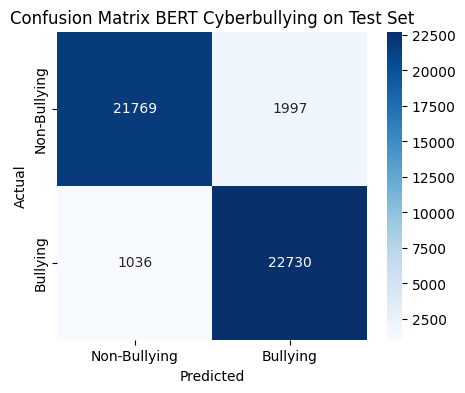

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model evaluation on the test dataset
test_dataset = TextDataset(test_encodings, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()
test_loss = 0
preds, true_labels = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating [Test]"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        with torch.amp.autocast("cuda"):
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

        test_loss += loss.item()
        preds.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader)
print(f"Test Loss = {test_loss:.4f}")

print("\nClassification Report:\n")
print(classification_report(true_labels, preds, digits=4))

cm = confusion_matrix(true_labels, preds)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Non-Bullying', 'Bullying'],
    yticklabels=['Non-Bullying', 'Bullying']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BERT Cyberbullying on Test Set')
plt.show()

# **Evaluasi Akhir Model BERT dan Simpan Hasil ke CSV**

Evaluating:   0%|          | 0/1486 [00:00<?, ?it/s]

/tmp/ipykernel_24/2285949884.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': torch.tensor(self.labels[idx], dtype=torch.long)



Hasil Evaluasi Model BERT Cyberbullying:
              precision    recall  f1-score   support

           0     0.9372    0.9283    0.9327     23766
           1     0.9290    0.9378    0.9334     23766

    accuracy                         0.9330     47532
   macro avg     0.9331    0.9330    0.9330     47532
weighted avg     0.9331    0.9330    0.9330     47532


Confusion Matrix:
[[22062  1704]
 [ 1479 22287]]


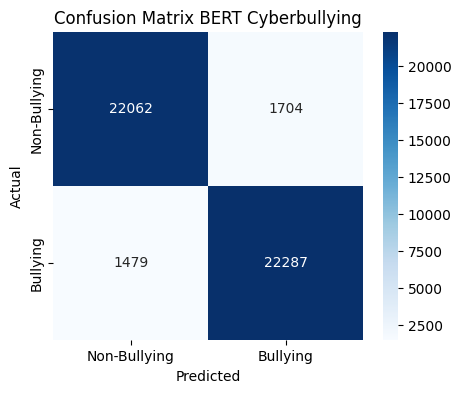

In [17]:
from transformers import BertForSequenceClassification, BertTokenizer
from sklearn.metrics import classification_report, confusion_matrix
from tqdm.auto import tqdm
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model terbaik yang sudah dilatih dan tokenizer
model_path = "/kaggle/working/bert_best"
model = BertForSequenceClassification.from_pretrained(model_path).to(device)
tokenizer = BertTokenizer.from_pretrained(model_path)
model.eval()

# List untuk menyimpan prediksi dan label
all_preds, all_labels = [], []

# Evaluasi model tanpa perhitungan gradien
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        # Memindahkan data batch ke device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Lakukan prediksi dengan model
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)  # Prediksi berdasarkan logit model

        # Menyimpan prediksi dan label untuk evaluasi
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Model BERT Cyberbullying:")
print(classification_report(all_labels, all_preds, digits=4))

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(all_labels, all_preds)
print(cm)

# Optional: Menampilkan confusion matrix dalam bentuk heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Non-Bullying', 'Bullying'],
    yticklabels=['Non-Bullying', 'Bullying']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BERT Cyberbullying')
plt.show()

In [18]:
import pandas as pd

report = classification_report(all_labels, all_preds, digits=4, output_dict=True)
pd.DataFrame(report).transpose().to_csv("/kaggle/working/bert_evaluation_results.csv")

print("Hasil tersimpan di /kaggle/working/bert_evaluation_results.csv")

Hasil tersimpan di /kaggle/working/bert_evaluation_results.csv


# **Eksperimen: Perbandingan Teknik Ekstraksi Embedding Internal BERT**

In [19]:
from transformers import BertModel, BertTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = "/kaggle/working/bert_best"

tokenizer = BertTokenizer.from_pretrained(model_path)
bert_model = BertModel.from_pretrained(model_path, output_hidden_states=True).to(device)
bert_model.eval()

def get_embeddings(texts, method="cls", batch_size=16):
    embeddings = []

    for i in tqdm(range(0, len(texts), batch_size), desc=f"Embedding ({method})"):
        batch_texts = texts[i:i+batch_size].tolist()
        enc = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=64,
            return_tensors='pt'
        ).to(device)

        with torch.no_grad():
            outputs = bert_model(**enc)
            hidden_states = outputs.hidden_states

        if method == "cls":
            emb = hidden_states[-1][:, 0, :]
        elif method == "mean":
            emb = torch.mean(hidden_states[-1], dim=1)
        elif method == "concat":
            concat_last4 = torch.cat(hidden_states[-4:], dim=-1)
            emb = torch.mean(concat_last4, dim=1)

        embeddings.append(emb.cpu().numpy())

    return np.vstack(embeddings)

print("Mengekstraksi embedding...")

X_train_cls = get_embeddings(X_train, "cls")
X_test_cls  = get_embeddings(X_test, "cls")

X_train_mean = get_embeddings(X_train, "mean")
X_test_mean  = get_embeddings(X_test, "mean")

X_train_concat = get_embeddings(X_train, "concat")
X_test_concat  = get_embeddings(X_test, "concat")

Mengekstraksi embedding...


Embedding (cls):   0%|          | 0/10695 [00:00<?, ?it/s]

Embedding (cls):   0%|          | 0/2971 [00:00<?, ?it/s]

Embedding (mean):   0%|          | 0/10695 [00:00<?, ?it/s]

Embedding (mean):   0%|          | 0/2971 [00:00<?, ?it/s]

Embedding (concat):   0%|          | 0/10695 [00:00<?, ?it/s]

Embedding (concat):   0%|          | 0/2971 [00:00<?, ?it/s]

# **Evaluasi Performa Berbagai Teknik Ekstraksi Embedding BERT Menggunakan Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import os

results = {}

embeddings = {
    "CLS": (X_train_cls, X_test_cls),
    "Mean": (X_train_mean, X_test_mean),
    "Concat": (X_train_concat, X_test_concat)
}

for name, (Xtr, Xte) in embeddings.items():
    clf = LogisticRegression(max_iter=1000)
    clf.fit(Xtr, train_labels)
    preds = clf.predict(Xte)

    report_dict = classification_report(test_labels, preds, digits=4, output_dict=True)
    results[name] = report_dict

    print(f"\n=== {name} Embedding ===")
    print(classification_report(test_labels, preds, digits=4))

rows = []
for method, rep in results.items():
    rows.append({
        "Method": method,
        "Accuracy": rep["accuracy"],
        "F1-score": rep["weighted avg"]["f1-score"]
    })

df_results = pd.DataFrame(rows).sort_values(by=["F1-score", "Accuracy"], ascending=False)

out_path = "/kaggle/working/embedding_comparison_results.csv"
df_results.to_csv(out_path, index=False)

df_results


=== CLS Embedding ===
              precision    recall  f1-score   support

           0     0.9479    0.9229    0.9352     23766
           1     0.9249    0.9493    0.9369     23766

    accuracy                         0.9361     47532
   macro avg     0.9364    0.9361    0.9361     47532
weighted avg     0.9364    0.9361    0.9361     47532


=== Mean Embedding ===
              precision    recall  f1-score   support

           0     0.9468    0.9221    0.9343     23766
           1     0.9241    0.9482    0.9360     23766

    accuracy                         0.9352     47532
   macro avg     0.9355    0.9352    0.9351     47532
weighted avg     0.9355    0.9352    0.9351     47532


=== Concat Embedding ===
              precision    recall  f1-score   support

           0     0.9491    0.9220    0.9354     23766
           1     0.9242    0.9506    0.9372     23766

    accuracy                         0.9363     47532
   macro avg     0.9366    0.9363    0.9363     47532
w

,Method,Accuracy,F1-score
2,Concat,0.936275,0.936262
0,CLS,0.936064,0.936053
1,Mean,0.935159,0.935148


# **Perbandingan Kinerja Model Word2Vec (Default, Skip-gram, CBOW) untuk Klasifikasi Teks Menggunakan Regresi Logistik**

In [21]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

# =========================
# 1) CONVERT input_ids -> tokens (buat Word2Vec)
# =========================
def ids_to_tokens(encodings, tokenizer, batch_size=4096):
    all_tokens = []
    input_ids_list = encodings["input_ids"]

    for i in tqdm(range(0, len(input_ids_list), batch_size), desc="Decode to tokens"):
        batch_ids = input_ids_list[i:i+batch_size]
        for ids in batch_ids:
            # ids bisa list atau tensor
            if hasattr(ids, "tolist"):
                ids = ids.tolist()

            toks = tokenizer.convert_ids_to_tokens(ids, skip_special_tokens=True)
            toks = [t for t in toks if t and not t.startswith("[") and not t.startswith("##")]
            all_tokens.append(toks)

    return all_tokens

train_tokens = ids_to_tokens(train_encodings, tokenizer)
test_tokens  = ids_to_tokens(test_encodings, tokenizer)

# =========================
# 2) TRAIN WORD2VEC MODELS
# =========================
print("Training Word2Vec models...")

w2v_default = Word2Vec(
    sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4, sg=0
)

w2v_skipgram = Word2Vec(
    sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4, sg=1
)

w2v_cbow = Word2Vec(
    sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4, sg=0
)

# =========================
# 3) EMBEDDING FUNCTION (mean pooling)
# =========================
def get_w2v_embeddings(token_lists, model):
    wv = model.wv
    dim = model.vector_size
    embs = []

    for tokens in token_lists:
        if not tokens:
            embs.append(np.zeros(dim))
            continue

        vecs = [wv[w] for w in tokens if w in wv]
        embs.append(np.mean(vecs, axis=0) if len(vecs) else np.zeros(dim))

    return np.vstack(embs)

# =========================
# 4) BUILD TRAIN/TEST EMBEDDINGS
# =========================
X_train_default = get_w2v_embeddings(train_tokens, w2v_default)
X_test_default  = get_w2v_embeddings(test_tokens, w2v_default)

X_train_skip = get_w2v_embeddings(train_tokens, w2v_skipgram)
X_test_skip  = get_w2v_embeddings(test_tokens, w2v_skipgram)

X_train_cbow = get_w2v_embeddings(train_tokens, w2v_cbow)
X_test_cbow  = get_w2v_embeddings(test_tokens, w2v_cbow)

# =========================
# 5) LOGISTIC REGRESSION EVALUATION
# =========================
results_w2v = {}
w2v_embeddings = {
    "W2V_Default": (X_train_default, X_test_default),
    "W2V_Skipgram": (X_train_skip, X_test_skip),
    "W2V_CBOW": (X_train_cbow, X_test_cbow),
}

for name, (Xtr, Xte) in w2v_embeddings.items():
    clf = LogisticRegression(max_iter=1000)
    clf.fit(Xtr, train_labels)
    preds = clf.predict(Xte)

    rep = classification_report(test_labels, preds, digits=4, output_dict=True)
    results_w2v[name] = rep

    print(f"\n=== {name} ===")
    print(classification_report(test_labels, preds, digits=4))

# =========================
# 6) SUMMARY TABLE
# =========================
rows = []
for method, rep in results_w2v.items():
    rows.append({
        "Method": method,
        "Accuracy": rep["accuracy"],
        "F1-score": rep["weighted avg"]["f1-score"]
    })

df_w2v = pd.DataFrame(rows).sort_values(by=["F1-score", "Accuracy"], ascending=False)

out_path = "/kaggle/working/word2vec_comparison_results.csv"
df_w2v.to_csv(out_path, index=False)

print("\nSaved:", out_path)
df_w2v

/usr/local/lib/python3.12/dist-packages/google/cloud/aiplatform/models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


Decode to tokens:   0%|          | 0/42 [00:00<?, ?it/s]

Decode to tokens:   0%|          | 0/12 [00:00<?, ?it/s]

Training Word2Vec models...

=== W2V_Default ===
              precision    recall  f1-score   support

           0     0.8036    0.8505    0.8264     23766
           1     0.8412    0.7922    0.8160     23766

    accuracy                         0.8213     47532
   macro avg     0.8224    0.8213    0.8212     47532
weighted avg     0.8224    0.8213    0.8212     47532


=== W2V_Skipgram ===
              precision    recall  f1-score   support

           0     0.8101    0.8545    0.8317     23766
           1     0.8461    0.7997    0.8222     23766

    accuracy                         0.8271     47532
   macro avg     0.8281    0.8271    0.8270     47532
weighted avg     0.8281    0.8271    0.8270     47532


=== W2V_CBOW ===
              precision    recall  f1-score   support

           0     0.8039    0.8494    0.8260     23766
           1     0.8403    0.7928    0.8159     23766

    accuracy                         0.8211     47532
   macro avg     0.8221    0.8211    0.

,Method,Accuracy,F1-score
1,W2V_Skipgram,0.827106,0.826976
0,W2V_Default,0.821320,0.821169
2,W2V_CBOW,0.821068,0.820925


# **Evaluasi dan Visualisasi Kinerja Model Word2Vec (Default, Skip-gram, CBOW) untuk Klasifikasi Teks Bullying Menggunakan Regresi Logistik**

===== Ranking Final (Word2Vec) =====


,Method,Accuracy,F1-score
0,W2V_Skipgram,0.827106,0.826976
1,W2V_Default,0.821320,0.821169
2,W2V_CBOW,0.821068,0.820925


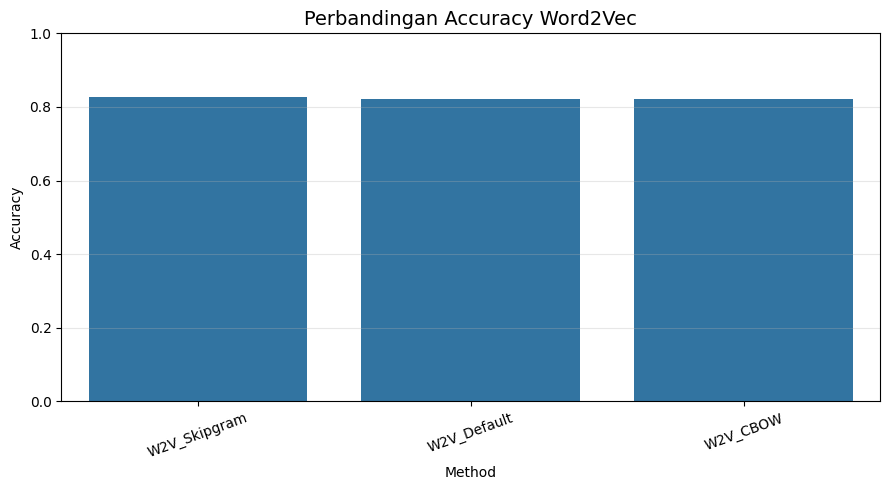

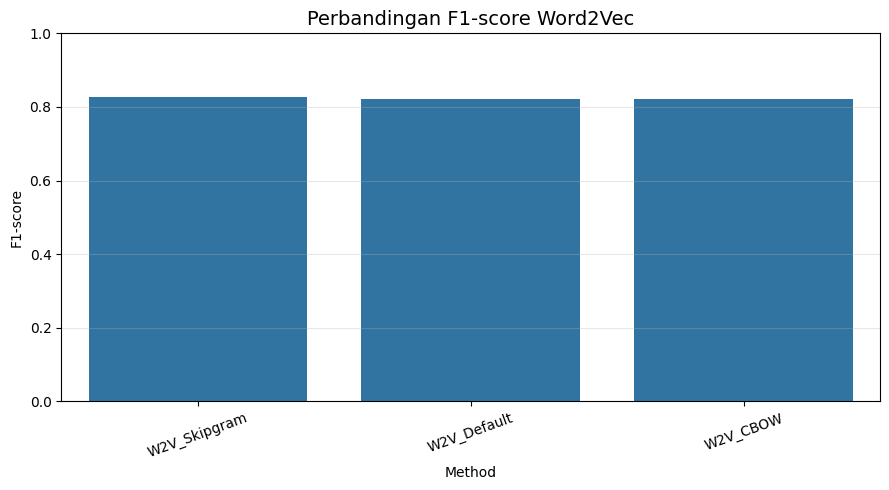

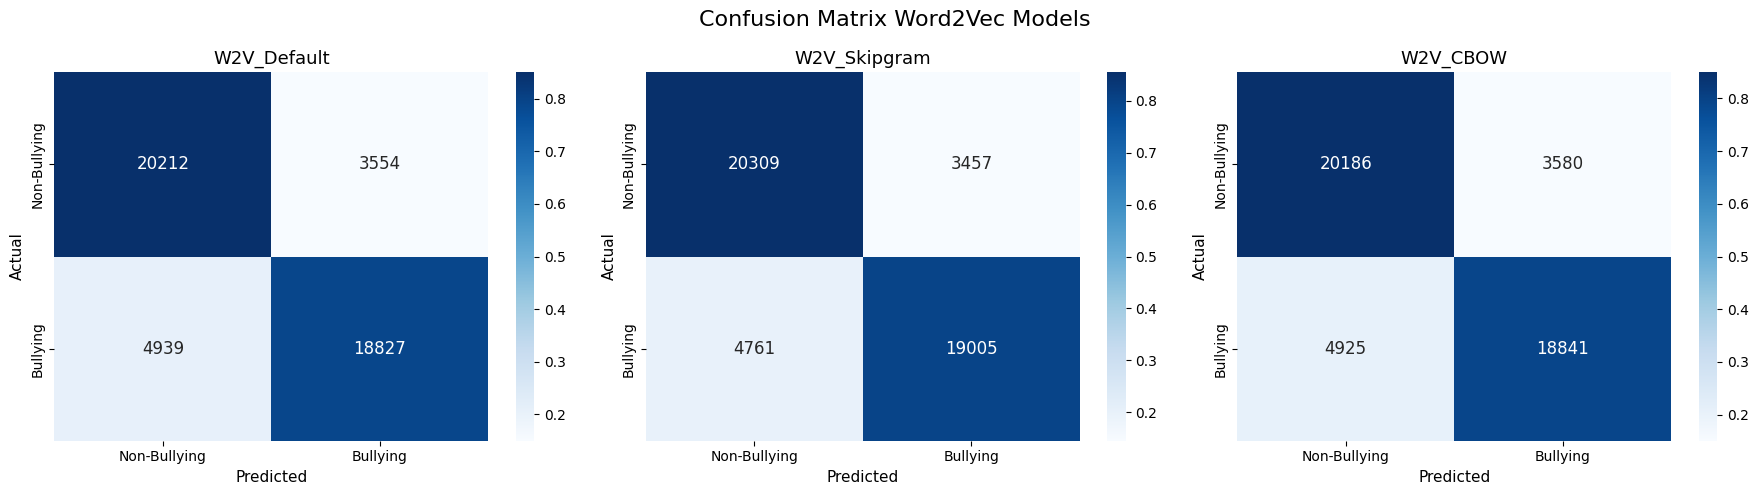

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np

# ===============================
# 0) SORTING + TABEL
# ===============================
df_sorted = df_w2v.sort_values(["F1-score", "Accuracy"], ascending=False).reset_index(drop=True)

print("===== Ranking Final (Word2Vec) =====")
display(df_sorted)

# ===============================
# 1) BARPLOT ACCURACY (lebih jelas)
# ===============================
plt.figure(figsize=(9,5))
sns.barplot(data=df_sorted, x="Method", y="Accuracy")
plt.title("Perbandingan Accuracy Word2Vec", fontsize=14)
plt.ylim(0,1)
plt.xticks(rotation=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================
# 2) BARPLOT F1-SCORE (lebih jelas)
# ===============================
plt.figure(figsize=(9,5))
sns.barplot(data=df_sorted, x="Method", y="F1-score")
plt.title("Perbandingan F1-score Word2Vec", fontsize=14)
plt.ylim(0,1)
plt.xticks(rotation=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================
# 3) CONFUSION MATRIX (besar & jelas)
# ===============================
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, (name, (Xtr, Xte)) in zip(axes, w2v_embeddings.items()):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(Xtr, train_labels)
    preds = clf.predict(Xte)

    cm = confusion_matrix(test_labels, preds)
    
    # Buat versi persentase juga
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(
        cm_percent,
        annot=cm,
        fmt="d",
        cmap="Blues",
        xticklabels=["Non-Bullying", "Bullying"],
        yticklabels=["Non-Bullying", "Bullying"],
        cbar=True,
        ax=ax,
        annot_kws={"size":12}
    )

    ax.set_title(f"{name}", fontsize=13)
    ax.set_xlabel("Predicted", fontsize=11)
    ax.set_ylabel("Actual", fontsize=11)

plt.suptitle("Confusion Matrix Word2Vec Models", fontsize=16)
plt.tight_layout()
plt.show()

# **Analisis Empiris Perbandingan Representasi Embedding (CLS, Mean, Concat, Word2Vec, Skip-gram, dan CBOW) pada Model Klasifikasi Cyberbullying** 

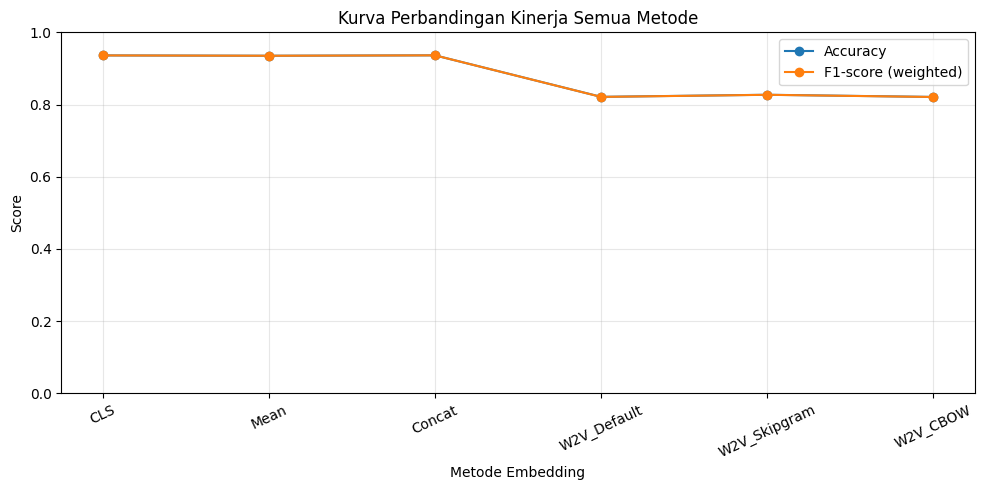

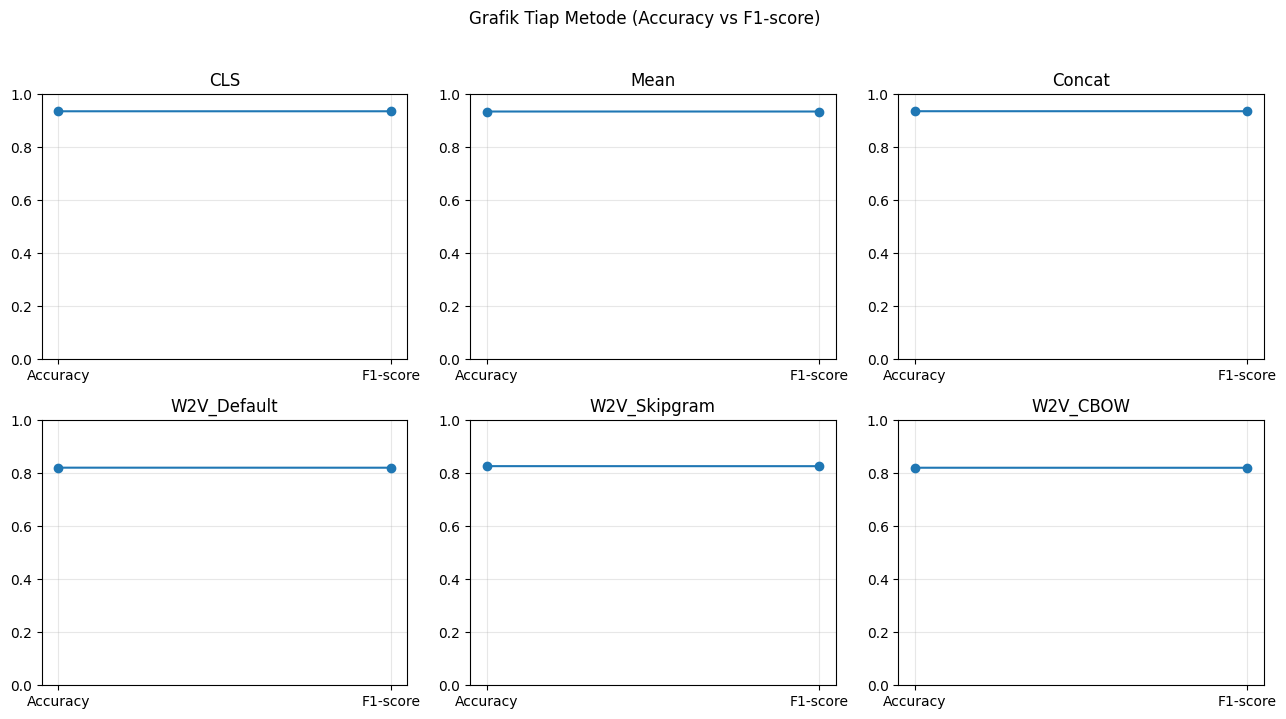

,Method,Accuracy,F1-score
0,CLS,0.936064,0.936053
1,Mean,0.935159,0.935148
2,Concat,0.936275,0.936262
3,W2V_Default,0.821320,0.821169
4,W2V_Skipgram,0.827106,0.826976
5,W2V_CBOW,0.821068,0.820925


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 0) GABUNG DATA
# ===============================
df_all = pd.concat([df_results, df_w2v], ignore_index=True)

order = ["CLS", "Mean", "Concat", "W2V_Default", "W2V_Skipgram", "W2V_CBOW"]
df_all["Method"] = pd.Categorical(df_all["Method"], categories=order, ordered=True)
df_all = df_all.sort_values("Method").reset_index(drop=True)

x = df_all["Method"].astype(str).tolist()
acc = df_all["Accuracy"].tolist()
f1 = df_all["F1-score"].tolist()

# ===============================
# 1) KURVA GABUNGAN (1 GRAFIK)
# ===============================
plt.figure(figsize=(10,5))
plt.plot(x, acc, marker="o", label="Accuracy")
plt.plot(x, f1, marker="o", label="F1-score (weighted)")
plt.title("Kurva Perbandingan Kinerja Semua Metode")
plt.xlabel("Metode Embedding")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

# ===============================
# 2) 6 GRAFIK (MASING-MASING METODE)
# ===============================
fig, axes = plt.subplots(2, 3, figsize=(13,7))
axes = axes.flatten()

for i, row in df_all.iterrows():
    method = str(row["Method"])
    y = [row["Accuracy"], row["F1-score"]]
    x_local = ["Accuracy", "F1-score"]

    ax = axes[i]
    ax.plot(x_local, y, marker="o")
    ax.set_title(method)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)

plt.suptitle("Grafik Tiap Metode (Accuracy vs F1-score)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

# tabel biar rapi juga
df_all

# **Pemeringkatan Akhir dan Penentuan Metode Embedding Terbaik Berdasarkan F1-score dan Accuracy**

===== PERINGKAT AKHIR SEMUA METODE =====


,Method,Accuracy,F1-score
0,Concat,0.936275,0.936262
1,CLS,0.936064,0.936053
2,Mean,0.935159,0.935148
3,W2V_Skipgram,0.827106,0.826976
4,W2V_Default,0.821320,0.821169
5,W2V_CBOW,0.821068,0.820925



===== MODEL TERBAIK =====
Metode      : Concat
F1-score    : 0.9363
Accuracy    : 0.9363


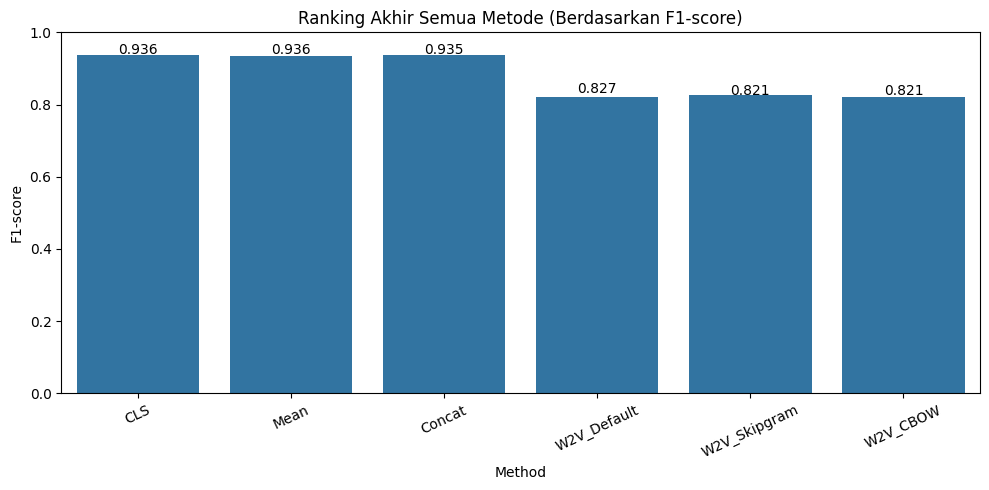

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1️⃣ SORTING BERDASARKAN F1
# ===============================
df_final = df_all.sort_values(
    by=["F1-score", "Accuracy"],
    ascending=False
).reset_index(drop=True)

print("===== PERINGKAT AKHIR SEMUA METODE =====")
display(df_final)

# ===============================
# 2️⃣ TENTUKAN MODEL TERBAIK
# ===============================
best_model = df_final.iloc[0]

print("\n===== MODEL TERBAIK =====")
print(f"Metode      : {best_model['Method']}")
print(f"F1-score    : {best_model['F1-score']:.4f}")
print(f"Accuracy    : {best_model['Accuracy']:.4f}")

# ===============================
# 3️⃣ VISUAL RANKING FINAL
# ===============================
plt.figure(figsize=(10,5))
sns.barplot(data=df_final, x="Method", y="F1-score")

# Tambahkan angka di atas bar
for index, row in df_final.iterrows():
    plt.text(index, row["F1-score"] + 0.005,
             f"{row['F1-score']:.3f}",
             ha='center')

plt.title("Ranking Akhir Semua Metode (Berdasarkan F1-score)")
plt.ylim(0,1)
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()